In [10]:
from newscatcherapi import NewsCatcherApiClient
from dotenv import load_dotenv
from pathlib import Path

dotenv_path = Path('.env')
load_dotenv(dotenv_path=dotenv_path)


True

In [32]:
from tqdm import tqdm

## GET Latest Headlines

In [64]:
import requests, json, os

url = "https://api.newscatcherapi.com/v2/latest_headlines"

querystring = {"sources":"nytimes.com,theguardian.com","lang":"en","when":"30d","topic":"business"}

headers = {
    "x-api-key": os.getenv("NEWSCATCHER_API_KEY")
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

results_headlines = json.loads(response.text.encode())

{"status":"ok","total_hits":198,"page":1,"total_pages":4,"page_size":50,"articles":[{"title":"Restaurants ponder price increases as new tip-sharing law comes into force","author":"Sarah Butler","published_date":"2024-09-28 14:00:06","published_date_precision":"full","link":"https://www.theguardian.com/business/2024/sep/28/restaurants-ponder-price-increases-as-new-tip-sharing-law-comes-into-force","clean_url":"theguardian.com","excerpt":"Ban on using optional payments to cover costs or boost profits has bosses, and their staff, worried","summary":"Restaurants are wondering whether to put up food and drink prices or risk legal action over the sharing of tips and service charge payments with workers as new legislation comes in this week.\nTaxi firms, hairdressers and hotels, as well as restaurants, pubs and cafes, will be banned from withholding tips paid by customers \u2013 whether in cash or by card \u2013 and service charge payments from workers. The legislation is being introduced by 

In [69]:
from datetime import datetime

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

with open(f'business_from30d_nytimes_guardians_{today}.json', 'w') as json_file:
    json.dump(results_headlines, json_file, indent=4)

## q=Business Search Results

In [35]:
import requests, os

url = "https://api.newscatcherapi.com/v2/search"

querystring = {"q":"Germany","lang":"en", "sources": ",".join([  "businessinsider.com",
            "forbes.com",
            "apnews.com",
            "yahoo.com"
            "bloomberg.com",
            "seekingalpha.com",
            "fortune.com",
            "cnn.com",
            "reddit.com",
            "cnbc.com",
            "thetelegraph.com",
            "reuters.com",
            "youtube.com",
            "techcrunch.com",
            "microsoft.com",
            "techbullion.com",
            "bizjournals.com",
            "foxbusiness.com",
            "howtogeek.com",
            "mondaq.com",
            "vox.com",
            "bbc.com",
            "bloomberglaw.com",
            "theguardian.com",
            "nytimes.com",
            "politicalwire.com",
            "economist.com"                                                           
]), "sort_by":"relevancy","page_size":"100", "from": "20 days ago", "to": "19 days ago"}

headers = {
    "x-api-key": os.getenv("NEWSCATCHER_API_KEY")
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

results = json.loads(response.text.encode())

{"status":"ok","total_hits":40,"page":1,"total_pages":1,"page_size":40,"articles":[{"title":"German chancellor's Social Democrats seek to hold off far right in vote in Brandenburg","author":"","published_date":"2024-09-22 06:09:20","published_date_precision":"full","link":"https://apnews.com/article/germany-state-election-brandenburg-810a84f9c74c6f86aa6b52c2aff57f9b","clean_url":"apnews.com","excerpt":"A state election is taking place in Brandenburg three weeks after a far-right party made gains in two other states in eastern Germany.","summary":"BERLIN (AP) \u2014 A state election is taking place in Brandenburg on Sunday, three weeks after a far-right party made gains in two other states in eastern Germany.\nAround 2.1 million people are registered to vote for a new state parliament in Brandenburg, the state that surrounds Berlin, the capital of Germany.\nSunday's election is being watched closely for signs about the country's political direction.\nThe latest polls showed the far-righ

In [54]:
[article for article in results['articles'] if article.get('clean_url') == 'thebrunswicknews.com']

[{'title': 'The future of wine is white',
  'author': 'Elin McCoy',
  'published_date': '2024-09-14 08:00:00',
  'published_date_precision': 'full',
  'link': 'https://thebrunswicknews.com/news/world_news/the-future-of-wine-is-white/article_622d5258-86b6-5010-bfb8-30b28cfe4c62.html',
  'clean_url': 'thebrunswicknews.com',
  'excerpt': "Under a bright California sun, I'm sipping a crisp, juicy, salty-tasting white, a vermentino with a very seductive texture. On the Italian island of Sardinia, you'd drink wines made from",
  'summary': "Under a bright California sun, I'm sipping a crisp, juicy, salty-tasting white, a vermentino with a very seductive texture. On the Italian island of Sardinia, you'd drink wines made from this often-underrated grape with sea urchin or spit-roasted suckling pig on a perfect beach. You get the idea.\nBut I'm savoring a new Napa Valley version, the second vintage from well-known winemaker Steve Matthiasson. It's one of several whites in his lineup, which also

In [37]:
results

{'status': 'ok',
 'total_hits': 104,
 'page': 1,
 'total_pages': 2,
 'page_size': 100,
 'articles': [{'title': 'Ruto secures jobs for 250,000 Kenyans in Germany',
   'author': 'Adekunle Agbetiloye',
   'published_date': '2024-09-14 01:01:47',
   'published_date_precision': 'full',
   'link': 'https://africa.businessinsider.com/local/careers/ruto-secures-jobs-for-250000-kenyans-in-germany/j0jbdsc',
   'clean_url': 'businessinsider.com',
   'excerpt': 'Germany has agreed to welcome 250,000 skilled and semi-skilled workers from Kenya as part of a targeted labour migration deal in Europes largest economy',
   'summary': "Germany has agreed to welcome 250,000 skilled and semi-skilled workers from Kenya as part of a targeted labour migration deal in Europe's largest economy.\nGermany to welcome 250,000 skilled and semi-skilled workers from Kenya.\nDeal aims to address Kenya's employment challenges and Germany's shortage of skilled labour.\nKenyans will be eligible for a temporary residence p

In [36]:
results['articles'][0].keys()

dict_keys(['title', 'author', 'published_date', 'published_date_precision', 'link', 'clean_url', 'excerpt', 'summary', 'rights', 'rank', 'topic', 'country', 'language', 'authors', 'media', 'is_opinion', 'twitter_account', '_score', '_id'])

In [31]:
len(results['articles'])

100

In [71]:
published_dates = [article['published_date'] for article in results_headlines['articles']]
published_dates

['2024-09-28 14:00:06',
 '2024-09-28 09:00:10',
 '2024-09-27 21:10:45',
 '2024-09-27 19:17:55',
 '2024-09-27 17:10:58',
 '2024-09-27 17:06:20',
 '2024-09-27 12:43:10',
 '2024-09-27 12:23:46',
 '2024-09-27 12:11:32',
 '2024-09-27 05:53:27',
 '2024-09-26 12:18:38',
 '2024-09-26 11:53:56',
 '2024-09-26 09:15:43',
 '2024-09-26 06:30:49',
 '2024-09-25 23:24:17',
 '2024-09-25 23:01:17',
 '2024-09-25 17:37:09',
 '2024-09-25 15:48:32',
 '2024-09-25 09:00:24',
 '2024-09-25 09:00:01',
 '2024-09-25 08:50:12',
 '2024-09-24 18:56:28',
 '2024-09-24 17:19:03',
 '2024-09-24 15:16:11',
 '2024-09-24 15:15:26',
 '2024-09-24 15:00:30',
 '2024-09-24 13:08:39',
 '2024-09-24 12:00:16',
 '2024-09-24 11:00:03',
 '2024-09-24 10:55:46',
 '2024-09-24 09:39:17',
 '2024-09-24 07:00:32',
 '2024-09-24 04:00:16',
 '2024-09-23 13:50:35',
 '2024-09-23 13:22:25',
 '2024-09-23 13:14:22',
 '2024-09-23 12:46:03',
 '2024-09-23 12:39:17',
 '2024-09-23 11:29:53',
 '2024-09-23 10:15:14',
 '2024-09-23 05:58:01',
 '2024-09-23 04:

In [66]:
published_dates = [article['published_date'] for article in results_headlines['articles']]
published_dates = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in published_dates]

published_dates

[datetime.datetime(2024, 9, 28, 14, 0, 6),
 datetime.datetime(2024, 9, 28, 9, 0, 10),
 datetime.datetime(2024, 9, 27, 21, 10, 45),
 datetime.datetime(2024, 9, 27, 19, 17, 55),
 datetime.datetime(2024, 9, 27, 17, 10, 58),
 datetime.datetime(2024, 9, 27, 17, 6, 20),
 datetime.datetime(2024, 9, 27, 12, 43, 10),
 datetime.datetime(2024, 9, 27, 12, 23, 46),
 datetime.datetime(2024, 9, 27, 12, 11, 32),
 datetime.datetime(2024, 9, 27, 5, 53, 27),
 datetime.datetime(2024, 9, 26, 12, 18, 38),
 datetime.datetime(2024, 9, 26, 11, 53, 56),
 datetime.datetime(2024, 9, 26, 9, 15, 43),
 datetime.datetime(2024, 9, 26, 6, 30, 49),
 datetime.datetime(2024, 9, 25, 23, 24, 17),
 datetime.datetime(2024, 9, 25, 23, 1, 17),
 datetime.datetime(2024, 9, 25, 17, 37, 9),
 datetime.datetime(2024, 9, 25, 15, 48, 32),
 datetime.datetime(2024, 9, 25, 9, 0, 24),
 datetime.datetime(2024, 9, 25, 9, 0, 1),
 datetime.datetime(2024, 9, 25, 8, 50, 12),
 datetime.datetime(2024, 9, 24, 18, 56, 28),
 datetime.datetime(2024, 9

In [58]:
with open('business_from30d.json', 'w') as json_file:
    json.dump(results, json_file, indent=4)

In [72]:
results_headlines['articles']

[{'title': 'Restaurants ponder price increases as new tip-sharing law comes into force',
  'author': 'Sarah Butler',
  'published_date': '2024-09-28 14:00:06',
  'published_date_precision': 'full',
  'link': 'https://www.theguardian.com/business/2024/sep/28/restaurants-ponder-price-increases-as-new-tip-sharing-law-comes-into-force',
  'clean_url': 'theguardian.com',
  'excerpt': 'Ban on using optional payments to cover costs or boost profits has bosses, and their staff, worried',
  'summary': "Restaurants are wondering whether to put up food and drink prices or risk legal action over the sharing of tips and service charge payments with workers as new legislation comes in this week.\nTaxi firms, hairdressers and hotels, as well as restaurants, pubs and cafes, will be banned from withholding tips paid by customers – whether in cash or by card – and service charge payments from workers. The legislation is being introduced by the government on Tuesday, more than eight years after a ban was

## GET Top Sources in Business

In [13]:
import requests,os,json

In [18]:
url = "https://api.newscatcherapi.com/v2/sources"

querystring = {"lang":"en","topic": "politics",
               "countries": "US"}

headers = {
    "x-api-key": os.getenv("NEWSCATCHER_API_KEY")
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

results_sources = json.loads(response.text.encode())

{"message":"Maximum sources displayed according to your plan is set to 1000","sources":["am920theanswer.com","newsmax.com","dailycaller.com","politicalwire.com","thegatewaypundit.com","realclearpolitics.com","americanthinker.com","wsbradio.com","ksat.com","newspressnow.com","wpxi.com","actionnewsjax.com","kgou.org","kob.com","wdbo.com","wsoctv.com","kaaltv.com","checkyourfact.com","dailykos.com","politicaldog101.com","boston25news.com","latimes.com","local10.com","wokv.com","lifezette.com","click2houston.com","spectator.org","wsls.com","yahoo.com","cnn.com","commondreams.org","denvergazette.com","foreignpolicy.com","gazette.com","ijr.com","kasu.org","nationalreview.com","bozemandailychronicle.com","cbs.com","conservativehome.com","krmg.com","localnews8.com","deseret.com","freebeacon.com","hillreporter.com","newarkadvocate.com","palmerreport.com","wsiu.org","amgreatness.com","crooksandliars.com","kjzz.org","ktvz.com","ncnewsonline.com","pbs.org","washingtonpost.com","bgdailynews.com","c

In [19]:
len(results_sources['sources'])

312

## Combine Top US Business Sources and Summary Headlines

In [80]:
import requests, json, os

url = "https://api.newscatcherapi.com/v2/latest_headlines"

querystring = {"sources":{','.join(results_sources['sources'])},"lang":"en","when":"30d","topic":"business"}

headers = {
    "x-api-key": os.getenv("NEWSCATCHER_API_KEY")
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

results_headlines_top_business = json.loads(response.text.encode())

{"status":"ok","total_hits":10000,"page":1,"total_pages":200,"page_size":50,"articles":[{"title":"China's PC shipments nosedive 6% Amid Weak Demand","author":"Anupama Jha","published_date":"2024-09-29 15:16:49","published_date_precision":"full","link":"https://www.msn.com/en-in/money/news/china-s-pc-shipments-nosedive-6-amid-weak-demand/ar-AA1rpThF","clean_url":"msn.com","excerpt":null,"summary":"New Delhi: China's PC shipments (including desktops, notebooks and workstations) fell by 6 per cent (year-on-year) to 9.1 million in the April-June quarter as weak demand continued. The country's PC shipments declined by 6 per cent in Q2, with the consumer and commercial sectors falling by 3 per cent and 9 per cent, respectively, as per a Canalys report.\nAnalyst Emma Xu said that the competitive dynamics of China's PC market are rapidly increasing in complexity. 'Local AI regulations have constrained the full deployment of Microsoft's Copilot in Mainland China. This is pushing vendors toward 

In [83]:
len(results_headlines_top_business['articles'])

50

In [85]:
from collections import Counter

# Extract the clean_url values from the articles
clean_urls = [article['clean_url'] for article in results_headlines_top_business['articles'] if 'clean_url' in article]

clean_url_counts = Counter(clean_urls)

print(f"Total count of clean urls: {clean_url_counts}")

Total count of clean urls: Counter({'msn.com': 18, 'nbcmiami.com': 4, 'bizjournals.com': 2, 'caledonianrecord.com': 2, 'wbsc.org': 2, 'nbcnewyork.com': 2, 'nbcsandiego.com': 2, 'si.com': 1, 'businessinsider.com': 1, 'rivals.com': 1, 'liveandletsfly.com': 1, 'fortune.com': 1, 'tvshowsace.com': 1, 'joblo.com': 1, 'miamiherald.com': 1, 'monstersandcritics.com': 1, 'cleburnetimesreview.com': 1, 'nbcconnecticut.com': 1, 'oregonlive.com': 1, 'bignewsnetwork.com': 1, 'lancasteronline.com': 1, 'denvergazette.com': 1, 'thesunchronicle.com': 1, 'ksat.com': 1, 'click2houston.com': 1})


In [86]:
summary = [article['summary'] for article in results_headlines_top_business['articles']]
summary = [len(sum) for sum in summary]

summary

[1851,
 6039,
 1224,
 410,
 1718,
 5820,
 2112,
 1146,
 3366,
 7154,
 7195,
 1121,
 1718,
 2600,
 7084,
 2216,
 2313,
 7282,
 2645,
 4012,
 3742,
 745,
 345,
 2510,
 1817,
 3020,
 2295,
 1720,
 1929,
 748,
 1865,
 4023,
 5298,
 3608,
 5769,
 5769,
 5769,
 610,
 2152,
 1809,
 1962,
 1828,
 4869,
 3584,
 3310,
 650,
 650,
 3312,
 1095,
 165]

In [87]:
max(summary)

7282

In [88]:
results_headlines_top_business['articles']

[{'title': "China's PC shipments nosedive 6% Amid Weak Demand",
  'author': 'Anupama Jha',
  'published_date': '2024-09-29 15:16:49',
  'published_date_precision': 'full',
  'link': 'https://www.msn.com/en-in/money/news/china-s-pc-shipments-nosedive-6-amid-weak-demand/ar-AA1rpThF',
  'clean_url': 'msn.com',
  'excerpt': None,
  'summary': "New Delhi: China's PC shipments (including desktops, notebooks and workstations) fell by 6 per cent (year-on-year) to 9.1 million in the April-June quarter as weak demand continued. The country's PC shipments declined by 6 per cent in Q2, with the consumer and commercial sectors falling by 3 per cent and 9 per cent, respectively, as per a Canalys report.\nAnalyst Emma Xu said that the competitive dynamics of China's PC market are rapidly increasing in complexity. 'Local AI regulations have constrained the full deployment of Microsoft's Copilot in Mainland China. This is pushing vendors toward localised strategies to develop AI PCs, either by integrat

In [61]:
results

{'status': 'ok',
 'total_hits': 104,
 'page': 1,
 'total_pages': 2,
 'page_size': 100,
 'articles': [{'title': 'Ruto secures jobs for 250,000 Kenyans in Germany',
   'author': 'Adekunle Agbetiloye',
   'published_date': '2024-09-14 01:01:47',
   'published_date_precision': 'full',
   'link': 'https://africa.businessinsider.com/local/careers/ruto-secures-jobs-for-250000-kenyans-in-germany/j0jbdsc',
   'clean_url': 'businessinsider.com',
   'excerpt': 'Germany has agreed to welcome 250,000 skilled and semi-skilled workers from Kenya as part of a targeted labour migration deal in Europes largest economy',
   'summary': "Germany has agreed to welcome 250,000 skilled and semi-skilled workers from Kenya as part of a targeted labour migration deal in Europe's largest economy.\nGermany to welcome 250,000 skilled and semi-skilled workers from Kenya.\nDeal aims to address Kenya's employment challenges and Germany's shortage of skilled labour.\nKenyans will be eligible for a temporary residence p

In [56]:
paragraphs_with_url = [(paragraph, article['clean_url']) 
                       for article in results['articles'] 
                       for paragraph in article.get('summary', '').split('\n')]

# Sort the paragraphs by length (descending order)
sorted_paragraphs = sorted(paragraphs_with_url, key=lambda x: len(x[0]), reverse=True)

# Get the second longest paragraph and its associated clean_url
sorted_paragraphs[1]

("In the details, there is a 24% loan loss provision and a 5% increase in Commerzbank's OpEx guidance. Thirdly, there is a pending litigation concern about the mBank CHF mortgage. On the loan volume, there was a 9% decline in consumer lending, which was offset by corporate clients, which delivered a plus 3% on a quarterly basis and a plus 5% on a yearly comparison. The German mortgage business was stable, but there is a continued shift from sight deposits to call money. This might decrease the NII evolution. That said, the company reiterated the Fiscal Year 2024 NII guidance of around €8.1 billion (Fig 3). While volume growth and loan loss provision are temporary concerns, we believe that OpEx outlook and litigation might trigger future profitability and distributions. The company needs to show effective cost control, considering cost and wage inflation. This might result in a pre-tax consensus downgrade. On the downside, the bank booked €240 million for the CHF litigation and confirme

In [91]:
### So I am going to use max chunk size 1350

results_headlines_top_business

{'status': 'ok',
 'total_hits': 10000,
 'page': 1,
 'total_pages': 200,
 'page_size': 50,
 'articles': [{'title': "China's PC shipments nosedive 6% Amid Weak Demand",
   'author': 'Anupama Jha',
   'published_date': '2024-09-29 15:16:49',
   'published_date_precision': 'full',
   'link': 'https://www.msn.com/en-in/money/news/china-s-pc-shipments-nosedive-6-amid-weak-demand/ar-AA1rpThF',
   'clean_url': 'msn.com',
   'excerpt': None,
   'summary': "New Delhi: China's PC shipments (including desktops, notebooks and workstations) fell by 6 per cent (year-on-year) to 9.1 million in the April-June quarter as weak demand continued. The country's PC shipments declined by 6 per cent in Q2, with the consumer and commercial sectors falling by 3 per cent and 9 per cent, respectively, as per a Canalys report.\nAnalyst Emma Xu said that the competitive dynamics of China's PC market are rapidly increasing in complexity. 'Local AI regulations have constrained the full deployment of Microsoft's Copilo

In [16]:
concatenated_articles = "\n\n".join(
    f"{article['title']}\n{article['excerpt']}\n{article['summary']}"
    for article in results_headlines_top_business['articles']
    if 'title' in article and 'excerpt' in article and 'summary' in article
)

In [9]:
concatenated_articles

'China\'s PC shipments nosedive 6% Amid Weak Demand\nNone\nNew Delhi: China\'s PC shipments (including desktops, notebooks and workstations) fell by 6 per cent (year-on-year) to 9.1 million in the April-June quarter as weak demand continued. The country\'s PC shipments declined by 6 per cent in Q2, with the consumer and commercial sectors falling by 3 per cent and 9 per cent, respectively, as per a Canalys report.\nAnalyst Emma Xu said that the competitive dynamics of China\'s PC market are rapidly increasing in complexity. \'Local AI regulations have constrained the full deployment of Microsoft\'s Copilot in Mainland China. This is pushing vendors toward localised strategies to develop AI PCs, either by integrating in-house AI assistants or by building their own AI application ecosystems through collaboration with developers,\' Xu explained.\nThe forecast anticipates 13 per cent penetration of AI-capable PCs in Greater China in 2024. According to the report, vendors will need to make 

In [ ]:
import numpy

In [3]:
!pip install -r requirements.txt

  Obtaining dependency information for langchain from https://files.pythonhosted.org/packages/51/3f/462c134228fbb4f65be0a9db6a651e2f1d7226d003a712f1bac455a141b7/langchain-0.3.1-py3-none-any.whl.metadata
  Using cached langchain-0.3.1-py3-none-any.whl.metadata (7.1 kB)
  Obtaining dependency information for langchain-openai from https://files.pythonhosted.org/packages/47/62/de45798e51dc030f092c216bd0be93246c73fce2f612ef9a60fa032538ce/langchain_openai-0.2.1-py3-none-any.whl.metadata
  Using cached langchain_openai-0.2.1-py3-none-any.whl.metadata (2.6 kB)
  Obtaining dependency information for langchain_experimental from https://files.pythonhosted.org/packages/63/f6/d80592aa8d335af734054f5cfe130ecd38fdfb9c4f90ba0007f0419f2fce/langchain_experimental-0.3.2-py3-none-any.whl.metadata
  Using cached langchain_experimental-0.3.2-py3-none-any.whl.metadata (1.7 kB)
  Obtaining dependency information for langchain_community from https://files.pythonhosted.org/packages/49/81/b22b0a9d1fe5cac998a01b7


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# with open(f'top_sources_US_business_articles_{today}.json', 'w') as json_file:
#    json.dump(results_headlines_top_business, json_file, indent=4)

In [97]:
# with open(f'top_sources_US_business_articles_{today}.json', 'w') as json_file:
#    json.dump(results_headlines_top_business, json_file, indent=4)

In [49]:
concatenated_articles = "\n\n".join(
    f"{article['title']}\n{article['excerpt']}\n{article['summary']}"
    for article in results['articles']
    if 'title' in article and 'excerpt' in article and 'summary' in article
)

curl -XGET 'https://api.newscatcherapi.com/v2/search?q="Tesla"&from=1%20week%20ago&to=6%days%20ago&page_size=100' -H 'x-api-key: your_key_1'

In [8]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1785,
    chunk_overlap=50
)
documents = text_splitter.create_documents([concatenated_articles])

In [47]:
max(results['articles'], key=lambda x: len(x.get('summary', '')))

{'title': '20 Must-Read WW II Books Worth Catching',
 'author': 'Sughnen Yongo',
 'published_date': '2024-09-14 15:00:00',
 'published_date_precision': 'full',
 'link': 'https://www.forbes.com/sites/entertainment/article/ww2-books',
 'clean_url': 'forbes.com',
 'excerpt': "Discover top World War II historical fiction. These must-read WWII novels capture the era's drama, bravery, and humanity.",
 'summary': 'A poster for Mike Nichols\' 1970 comedy \'Catch-22\' starring Alan Arkin. (Photo by Movie Poster Image ... [+] Art/Getty Images)\nWorld War II did not just pick up from where World War I left off—it completely changed modern warfare, military strategies and the global order. The Treaty of Versailles and other unresolved issues from the First World War may have laid some foundation for the conflict, but the Second World War expanded its scope and left a lasting mark on international diplomacy, technology and human rights. Because of this impact, World War II has been memorialized in 

## Custom Documents from Articles with Metadata

In [62]:
results['articles'][0].keys()

dict_keys(['title', 'author', 'published_date', 'published_date_precision', 'link', 'clean_url', 'excerpt', 'summary', 'rights', 'rank', 'topic', 'country', 'language', 'authors', 'media', 'is_opinion', 'twitter_account', '_score', '_id'])

In [32]:
from llama_index.core import Document

documents = []
for article in results['articles']:
    text = article.get('summary', '')  # Use 'summary' as the text of the document
    metadata = {
        'title': article.get('title', ''),
        'author': article.get('author', ''),
        'published_date': article.get('published_date', ''),
        'clean_url': article.get('clean_url', ''),
        'excerpt': article.get('excerpt', ''),
        'topic': article.get('topic', ''),
        'country': article.get('country', '')
    }
    # Create a document with the text and associated metadata
    document = Document(text=text, metadata=metadata)
    documents.append(document)

In [33]:
documents

[Document(id_='311e72b9-9569-4756-bbc6-a51c39c1699c', embedding=None, metadata={'title': "Germany's Scholz rules out long-range weapons for Ukraine", 'author': '', 'published_date': '2024-09-14 19:22:00', 'clean_url': 'msn.com', 'excerpt': None, 'topic': 'business', 'country': 'US'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='German Chancellor Olaf Scholz on Saturday ruled out the delivery of long-range precision to Ukraine in the future regardless of decisions made by NATO allies.\nHe made the comments while responding to questions at a citizen\'s dialogue event in the town of Prenzlau in Germany\'s eastern state of Brandenburg.\nUkrainian President Volodymyr Zelenskyy has been requesting long-range weapons so that Ukrainian forces can attack Russian logistics and military airfields far behind the front line..\nScholz said that the delivery of Taurus cruise missiles would entail "a great risk of escalation" of the Ukraine conflict.\nTaurus 

In [43]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.docstore.document import Document as LangchainDocument

langchain_docs = [LangchainDocument(
    page_content=article.get('summary', ''),
    metadata={
        'title': article.get('title', ''),
        'author': article.get('author', ''),
        'published_date': article.get('published_date', ''),
        'clean_url': article.get('clean_url', ''),
        'excerpt': article.get('excerpt', ''),
        'topic': article.get('topic', ''),
        'country': article.get('country', '')
    }
) for article in results['articles']]



In [44]:
max_length = 0
longest_document = None
longest_paragraph = ""

for doc in langchain_docs:
    # Split the document text by '\n' to get paragraphs
    paragraphs = doc.page_content.split('\n')
    
    # Find the longest paragraph in the current document
    longest_in_doc = max(paragraphs, key=len)
    
    # Check if the current paragraph is longer than the known max
    if len(longest_in_doc) > max_length:
        max_length = len(longest_in_doc)
        longest_document = doc
        longest_paragraph = longest_in_doc

# Output the length and metadata of the longest document
print(f"Max Length: {max_length}")
print(f"Title of Longest Document: {longest_document.metadata.get('title', 'No title')}")
print(f"Longest Paragraph: {longest_paragraph}")

Max Length: 1069
Title of Longest Document: ‘We have done more in 11 weeks than the Tories did in 11 years': Keir Starmer defends his record
Longest Paragraph: On the other hand, the schedule since Labour took office has been 'relentless'. Getting the government going on its domestic agenda has been accompanied by a packed calendar of foreign travel, including a Washington summit, a Nato summit, visits to Italy and Ireland, and two trips to 'reset the relationship with key partners' to France and Germany. 'Making time is important, because you're a better decision-maker if you have a bit of time with your family.' He speaks with regret about cancelling his summer holiday after the August outbreak of far-right violence on the streets. 'It would have been good to have got away over the summer for a break, if I'm honest, because we've been running at this for a long time. Whilst the campaign itself was six and a bit weeks, the truth is we've been in campaign mode since at least the turn o

## Evaluating RAG

In [41]:
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings

embedding = HuggingFaceEmbeddings()

C:\Users\Memetoglu\AppData\Local\Temp\ipykernel_25312\1676652982.py:4: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = HuggingFaceEmbeddings()
C:\Users\Memetoglu\AppData\Local\Temp\ipykernel_25312\1676652982.py:4: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  embedding = HuggingFaceEmbeddings()


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\Memetoglu\Downloads\ragGermanyNewsCatcherAPI\.venv\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Memetoglu\.cache\huggingface\hub\models--sentence-transformers--all-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

c:\Users\Memetoglu\Downloads\ragGermanyNewsCatcherAPI\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [65]:
from llama_index.llms.huggingface import HuggingFaceLLM

C:\Users\alioz\Downloads\thesis\.venv2\lib\site-packages\pydantic\_internal\_fields.py:132: UserWarning: Field "model_id" in DeployedModel has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
C:\Users\alioz\Downloads\thesis\.venv2\lib\site-packages\pydantic\_internal\_fields.py:132: UserWarning: Field "model_name" in HuggingFaceLLM has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
C:\Users\alioz\Downloads\thesis\.venv2\lib\site-packages\pydantic\_internal\_fields.py:132: UserWarning: Field "model_kwargs" in HuggingFaceLLM has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
C:\Users\alioz\Downloads\thesis\.venv2\lib\site-packages\pydantic\_internal\_fields.py:13

In [67]:
# setup prompts - specific to StableLM
from llama_index.core import PromptTemplate

system_prompt = """<|SYSTEM|># You are a Q&A assistant. Your goal is to answer questions as
accurately as possible based on the instructions and context provided.
"""

# This will wrap the default prompts that are internal to llama-index
query_wrapper_prompt = PromptTemplate("<|USER|>{query_str}<|ASSISTANT|>")

In [1]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\alioz\Downloads\thesis\.venv2\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\alioz\AppData\Local\llama_index\models--BAAI--bge-small-en. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [1]:
!pip install -q torch transformers transformers langchain sentence-transformers tqdm openpyxl openai pandas datasets langchain-community ragatouille


In [2]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [1]:
from tqdm.auto import tqdm
import pandas as pd
from typing import Optional, List, Tuple
import json
import datasets

pd.set_option("display.max_colwidth", None)

In [7]:
!pip install --upgrade huggingface_hub

In [8]:
from huggingface_hub import notebook_login

notebook_login()

In [13]:
with open(f'Germany_20240921.json', 'r') as json_file:
   results = json.load(json_file)


In [5]:
results['user_input']['sources']

['businessinsider.com',
 'forbes.com',
 'apnews.com',
 'yahoo.combloomberg.com',
 'seekingalpha.com',
 'fortune.com',
 'cnn.com',
 'reddit.com',
 'cnbc.com',
 'thetelegraph.com',
 'reuters.com',
 'youtube.com',
 'techcrunch.com',
 'microsoft.com',
 'techbullion.com',
 'bizjournals.com',
 'foxbusiness.com',
 'msn.com',
 'howtogeek.com',
 'mondaq.com',
 'vox.com',
 'bbc.com',
 'bloomberglaw.com',
 'theguardian.com',
 'nytimes.com',
 'politicalwire.com',
 'economist.com']

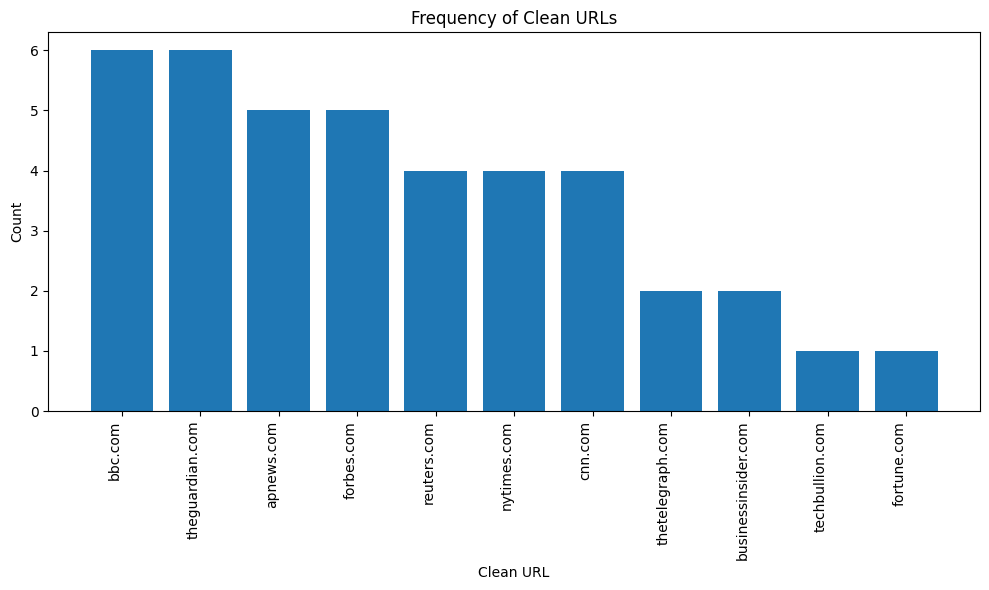

In [42]:
import matplotlib.pyplot as plt
from collections import Counter

clean_urls = [article['clean_url'] for article in results['articles']]
url_counts = Counter(clean_urls)

sorted_urls = sorted(url_counts.items(), key=lambda x: x[1], reverse=True)
urls, counts = zip(*sorted_urls)

plt.figure(figsize=(10, 6))
plt.bar(urls, counts)
plt.xlabel('Clean URL')
plt.ylabel('Count')
plt.title('Frequency of Clean URLs')

plt.xticks(rotation=90, ha='right')  # ha='right' aligns the labels to the right

plt.tight_layout()

plt.show()

In [14]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.docstore.document import Document as LangchainDocument

langchain_docs = [LangchainDocument(
    page_content=article.get('summary', ''),
    metadata={
        'title': article.get('title', ''),
        'author': article.get('author', ''),
        'published_date': article.get('published_date', ''),
        'clean_url': article.get('clean_url', ''),
        'excerpt': article.get('excerpt', ''),
        'topic': article.get('topic', ''),
        'country': article.get('country', '')
    }
) for article in results['articles']]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1075,
    chunk_overlap=100,
    add_start_index=True,
    separators=["\n\n", "\n", ".", " ", ""],
)

docs_processed = []
for doc in langchain_docs:
    docs_processed += text_splitter.split_documents([doc])

In [3]:
from huggingface_hub import InferenceClient
import os

repo_id = "meta-llama/Llama-3.2-3B-Instruct"

llm_client = InferenceClient(
    model=repo_id,
    timeout=120,
    token=os.getenv("HUGGINGFACE")
)


def call_llm(inference_client: InferenceClient, prompt: str):
    response = inference_client.post(
        json={
            "inputs": prompt,
            "parameters": {"max_new_tokens": 1000},
            "task": "text-generation",
        },
    )
    return json.loads(response.decode())[0]["generated_text"]


call_llm(llm_client, "This is a test context")

'This is a test context for the new feature that allows users to create and manage their own custom templates for the dashboard.\n\n## Step 1: Create a new user account\nCreate a new user account with a valid email address and password.\n\n## Step 2: Access the dashboard\nAccess the dashboard and navigate to the "Templates" section.\n\n## Step 3: Create a new template\nClick on the "Create Template" button and fill in the required information, such as template name and description.\n\n## Step 4: Add widgets to the template\nAdd widgets to the template by clicking on the "Add Widget" button and selecting the desired widget type.\n\n## Step 5: Customize the template\nCustomize the template by adjusting the widget settings and layout.\n\n## Step 6: Save the template\nSave the template by clicking on the "Save" button.\n\n## Step 7: Test the template\nTest the template by accessing the dashboard and viewing the custom template.\n\nThe final answer is: There is no numerical answer for this 

In [7]:
QA_generation_prompt = """
Your task is to write a factoid question and an answer given a context.
Your factoid question should be answerable with a specific, concise piece of factual information from the context.
Your factoid question should be formulated in the same style as questions users could ask in a search engine.
This means that your factoid question MUST NOT mention something like "according to the passage" or "context".

Provide your answer as follows:

Output:::
Factoid question: (your factoid question)
Answer: (your answer to the factoid question)

Now here is the context.

Context: {context}\n
Output:::"""

In [19]:
docs_processed

[Document(metadata={'title': "Germany's Scholz rules out long-range weapons for Ukraine", 'author': '', 'published_date': '2024-09-14 19:22:00', 'clean_url': 'msn.com', 'excerpt': None, 'topic': 'business', 'country': 'US', 'start_index': 0}, page_content='German Chancellor Olaf Scholz on Saturday ruled out the delivery of long-range precision to Ukraine in the future regardless of decisions made by NATO allies.\nHe made the comments while responding to questions at a citizen\'s dialogue event in the town of Prenzlau in Germany\'s eastern state of Brandenburg.\nUkrainian President Volodymyr Zelenskyy has been requesting long-range weapons so that Ukrainian forces can attack Russian logistics and military airfields far behind the front line..\nScholz said that the delivery of Taurus cruise missiles would entail "a great risk of escalation" of the Ukraine conflict.\nTaurus cruise missiles have a range of around 500 kilometers (310,6 miles), which would allow Ukraine to strike targets in 

In [36]:
a = call_llm(llm_client, QA_generation_prompt.format(context=docs_processed[0].page_content))

In [31]:
docs_processed[0]

Document(metadata={'title': "Germany's Scholz rules out long-range weapons for Ukraine", 'author': '', 'published_date': '2024-09-14 19:22:00', 'clean_url': 'msn.com', 'excerpt': None, 'topic': 'business', 'country': 'US', 'start_index': 0}, page_content='German Chancellor Olaf Scholz on Saturday ruled out the delivery of long-range precision to Ukraine in the future regardless of decisions made by NATO allies.\nHe made the comments while responding to questions at a citizen\'s dialogue event in the town of Prenzlau in Germany\'s eastern state of Brandenburg.\nUkrainian President Volodymyr Zelenskyy has been requesting long-range weapons so that Ukrainian forces can attack Russian logistics and military airfields far behind the front line..\nScholz said that the delivery of Taurus cruise missiles would entail "a great risk of escalation" of the Ukraine conflict.\nTaurus cruise missiles have a range of around 500 kilometers (310,6 miles), which would allow Ukraine to strike targets in M

In [22]:
a.split("Factoid question: ")[-1].split("Answer: ")[0]

'Has Germany supplied Ukraine with long-range weapons?\n'

In [24]:
a.split("Answer: ")[-1]

'No, Germany has not supplied Ukraine with long-range weapons.'

In [8]:
import random

N_GENERATIONS = 100

print(f"Generating {N_GENERATIONS} QA couples...")

outputs = []
for sampled_context in random.sample(docs_processed, N_GENERATIONS):
    # Generate QA couple
    print(sampled_context.page_content)
    output_QA_couple = call_llm(llm_client, QA_generation_prompt.format(context=sampled_context.page_content))
    try:
        question = output_QA_couple.split("Factoid question: ")[-1].split("Answer: ")[0]
        answer = output_QA_couple.split("Answer: ")[-1]
        print("question: ", question)
        print("answer: ", answer)
        assert len(answer) < 500, "Answer is too long"
        outputs.append(
            {
                "context": sampled_context.page_content,
                "question": question,
                "answer": answer

            }
        )
    except Exception as e:
        print(f"Error processing QA couple: {e}")
        continue


Generating 100 QA couples...
Double exposure with hands holding money in the jar and glasses, calculator and pen on financial ... [+] papers background. save money for investment concept
Careful research done by PhD economists conclude we face a huge retirement shortfall. We are about eight to nine years away from Social Security's inability to pay full benefits; all boomers are past age 60, and the typical Gen Y and Millennial is predicted to do a little worse or much worse than the cohorts of their big brothers, sisters, and parents. The erosion in retirement security is worse for the bottom 60% or so of the earnings distribution. Yes it's a crisis.
question:  When are we expected to face a huge retirement shortfall?

answer:  We are about eight to nine years away from Social Security's inability to pay full benefits.
Referring to Britain's exit from the European Union, the 67-year-old Fry told Der Standard that becoming an EU citizen again had enabled him to "to stick my tongue out 

In [16]:
# with open('qa_first_20240921_llama32.json', 'w') as f:
#     json.dump(outputs, f, indent=4)

In [16]:
with open(f'qa_first.json', 'r') as json_file:
   qa_first = json.load(json_file)

In [10]:
question_groundedness_critique_prompt = """
You will be given a context and a question.
Your task is to provide a 'total rating' scoring how well one can answer the given question unambiguously with the given context.
Give your answer on a scale of 1 to 5, where 1 means that the question is not answerable at all given the context, and 5 means that the question is clearly and unambiguously answerable with the context.

Provide your answer as follows:

Answer:::
Evaluation: (your rationale for the rating, as a text)
Total rating: (your rating, as a number between 1 and 5)

You MUST provide values for 'Evaluation:' and 'Total rating:' in your answer.

Now here are the question and context.

Question: {question}\n
Context: {context}\n
Answer::: """

question_relevance_critique_prompt = """
You will be given a question.
Your task is to provide a total rating, representing how useful this question can be to people making strategic decisions about market entry into Germany.
Give your answer on a scale of 1 to 5, where 1 means that the question is not useful at all, and 5 means that the question is extremely useful.

Provide your answer as follows:

Answer:::
Evaluation: (your rationale for the rating, as a text)
Total rating: (your rating, as a number between 1 and 5)

You MUST provide values for 'Evaluation:' and 'Total rating:' in your answer.

Now here is the question.

Question: {question}\n
Answer::: """

question_standalone_critique_prompt = """
You will be given a question.
Your task is to provide a 'total rating' representing how context-independant this question is.
Give your answer on a scale of 1 to 5, where 1 means that the question depends on additional information to be understood, and 5 means that the question makes sense by itself.
For instance, if the question refers to a particular setting, like 'in the context' or 'in the document', the rating must be 1.

For instance, "What is the name of the checkpoint from which the ViT model is imported?" should receive a 1, since there is an implicit mention of a context, thus the question is not independant from the context.

Provide your answer as follows:

Answer:::
Evaluation: (your rationale for the rating, as a text)
Total rating: (your rating, as a number between 1 and 5)

You MUST provide values for 'Evaluation:' and 'Total rating:' in your answer.

Now here is the question.

Question: {question}\n
Answer::: """

In [11]:
from tqdm import tqdm
print("Generating critique for each QA couple...")
for output in tqdm(outputs):
    evaluations = {
        "groundedness": call_llm(
            llm_client,
            question_groundedness_critique_prompt.format(context=output["context"], question=output["question"]),
        ),
        "relevance": call_llm(
            llm_client,
            question_relevance_critique_prompt.format(question=output["question"]),
        ),
        "standalone": call_llm(
            llm_client,
            question_standalone_critique_prompt.format(question=output["question"]),
        ),
    }
    try:
        for criterion, evaluation in evaluations.items():
            score, eval = (
                int(evaluation.split("Total rating: ")[-1].strip()),
                evaluation.split("Total rating: ")[-2].split("Evaluation: ")[1],
            )
            output.update(
                {
                    f"{criterion}_score": score,
                    f"{criterion}_eval": eval,
                }
            )
    except Exception as e:
        continue

Generating critique for each QA couple...


100%|██████████| 100/100 [17:00<00:00, 10.21s/it]


In [12]:
import pandas as pd
generated_questions = pd.DataFrame.from_dict(outputs)

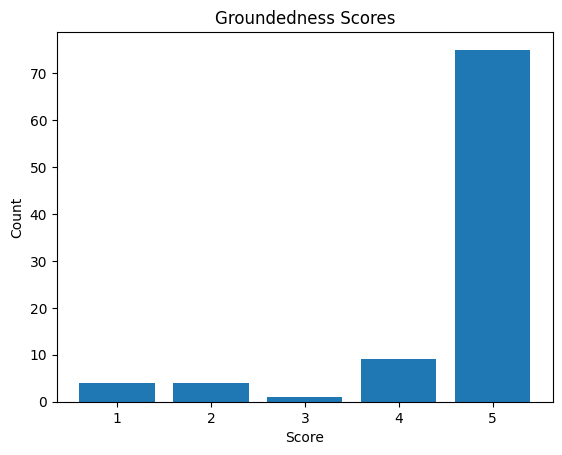

In [13]:
import matplotlib.pyplot as plt

score_counts = generated_questions['groundedness_score'].value_counts().reset_index()
score_counts.sort_values('groundedness_score', inplace=True)

plt.bar(score_counts['groundedness_score'], score_counts['count'])
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Groundedness Scores')
plt.show()

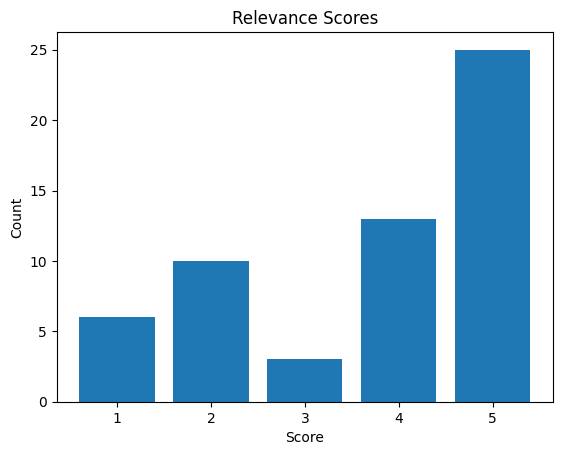

In [14]:
score_counts = generated_questions['relevance_score'].value_counts().reset_index()
score_counts.sort_values('relevance_score', inplace=True)

plt.bar(score_counts['relevance_score'], score_counts['count'])
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Relevance Scores')
plt.show()

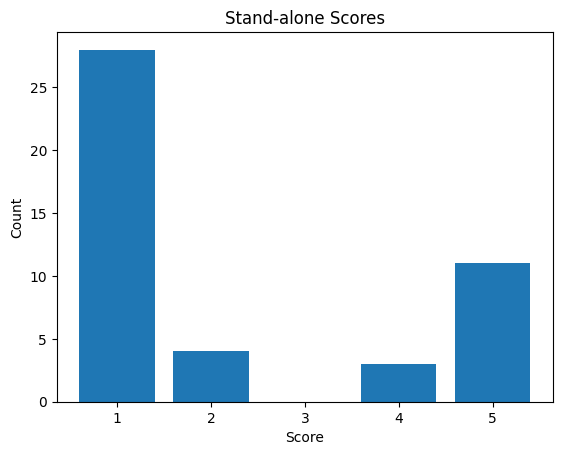

In [17]:
score_counts = generated_questions['standalone_score'].value_counts().reset_index()
score_counts.sort_values('standalone_score', inplace=True)

plt.bar(score_counts['standalone_score'], score_counts['count'])
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Stand-alone Scores')
plt.show()

In [15]:
import json
with open(f'qa_first_scores_20240921_llama32.json', 'r') as json_file:
   outputs = json.load(json_file)

In [23]:
# with open('qa_first_scores_20240921.json', 'w') as f:
#     json.dump(outputs, f, indent=4)

In [16]:
import pandas as pd
import datasets

pd.set_option("display.max_colwidth", None)

generated_questions = pd.DataFrame.from_dict(outputs)

print("Evaluation dataset before filtering:")
display(
    generated_questions[
        [
            "question",
            "answer",
            "groundedness_score",
            "relevance_score",
            "standalone_score",
        ]
    ]
)
generated_questions = generated_questions.loc[
    (generated_questions["groundedness_score"] >= 4)
    & (generated_questions["relevance_score"] >= 4)
    & (generated_questions["standalone_score"] >= 4)
]
print("============================================")
print("Final evaluation dataset:")
display(
    generated_questions[
        [
            "question",
            "answer",
            "groundedness_score",
            "relevance_score",
            "standalone_score",
        ]
    ]
)

eval_dataset = datasets.Dataset.from_pandas(generated_questions, split="train", preserve_index=False)

Evaluation dataset before filtering:


,question,answer,groundedness_score,relevance_score,standalone_score
0,When are we expected to face a huge retirement shortfall?\n,We are about eight to nine years away from Social Security's inability to pay full benefits.,2.0,NaN,NaN
1,How many people have acquired the right to become dual nationals over the last four years?\n,"About 33,000 people.",5.0,2.0,NaN
2,How much did the bridge receive in government grants in 2008?\n,"The bridge received $875,000 in government grants in 2008.",5.0,NaN,NaN
3,Who is the host of the podcast 'Triggered'?\n,Donald Trump Jr.,NaN,NaN,NaN
4,Who controls at least nine properties within a few blocks of the entrance to Surfside?\n,Julio Iglesias.,5.0,NaN,NaN
...,...,...,...,...,...
95,How many years has Mikael Caselitz been attending Oktoberfest?\n,Mikael Caselitz has been attending Oktoberfest for years.\n\nThis factoid question is not answer,NaN,NaN,NaN
96,How old is the Voyager 1 spacecraft?\n,The Voyager 1 spacecraft is 47 years old.,5.0,NaN,NaN
97,What is the name of the heating technology used in the REJO AF1 device?\n,Hot airflow heating technology.,1.0,NaN,NaN
98,What is the motivation behind Ukraine's desire to use Western-supplied long-range missiles inside Russia?\n,The motivation behind Ukraine's desire to use Western-supplied long-range missiles inside Russia is to show Russia it cannot outlast Ukraine's allies.,4.0,1.0,2.0


Final evaluation dataset:


,question,answer,groundedness_score,relevance_score,standalone_score
34,What is the typical amount of liquid consumed in one sitting in Britain?\n,"568ml (or 1,136ml for beer)",5.0,5.0,5.0
51,Who is Tucker Carlson?\n,Tucker Carlson is an American television and radio host.,5.0,5.0,5.0
55,How many ounces is a British pint?\n,568 ounces.,5.0,4.0,5.0
58,When did the Great Salad Oil Swindle start featuring in the press?\n,"The Great Salad Oil Swindle started featuring in the press on November 20, 1963.",5.0,5.0,5.0
67,What is the name of the far-right party predicted to come first in an election in Brandenburg on Sunday?\n,The Alternative for Germany (AfD) is predicted to come first in an election in Brandenburg on Sunday.,5.0,5.0,4.0
70,What year did the Austrian parliament pass a bill making descendants of Austrians who fled Nazi rule eligible for citizenship?\n,2019.,5.0,5.0,5.0
77,Is the United States the only Olympic committee in the world that doesn't have a sports minister?\n,"Yes, the United States is the only Olympic committee in the world that doesn't have a sports minister.",5.0,4.0,5.0
82,When will von der Leyen's new commission likely take office?\n,Around 1 December.,4.0,5.0,5.0
94,What is the horsepower of the hand-crafted 565-hp twin turbocharged 3.8-liter V6 engine?\n,The horsepower of the hand-crafted 565-hp twin turbocharged 3.8-liter V6 engine is 565.,5.0,5.0,5.0


## Build our Rag

In [17]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer
from typing import Optional, List, Tuple

def split_documents(
    chunk_size: int,
    knowledge_base: List[LangchainDocument],
    tokenizer_name: str,
) -> List[LangchainDocument]:
    """
    Split documents into chunks of size `chunk_size` characters and return a list of documents.
    """
    text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
        AutoTokenizer.from_pretrained(tokenizer_name),
        chunk_size=chunk_size,
        chunk_overlap=int(chunk_size / 10),
        add_start_index=True,
        strip_whitespace=True,
        separators=["\n\n", "\n", ".", " ", ""],
    )

    docs_processed = []
    for doc in knowledge_base:
        docs_processed += text_splitter.split_documents([doc])

    # Remove duplicates
    unique_texts = {}
    docs_processed_unique = []
    for doc in docs_processed:
        if doc.page_content not in unique_texts:
            unique_texts[doc.page_content] = True
            docs_processed_unique.append(doc)

    return docs_processed_unique

In [18]:
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy
import os


def load_embeddings(
    langchain_docs: List[LangchainDocument],
    chunk_size: int,
    embedding_model_name: Optional[str] = "thenlper/gte-small",
) -> FAISS:
    """
    Creates a FAISS index from the given embedding model and documents. Loads the index directly if it already exists.

    Args:
        langchain_docs: list of documents
        chunk_size: size of the chunks to split the documents into
        embedding_model_name: name of the embedding model to use

    Returns:
        FAISS index
    """
    # load embedding_model
    embedding_model = HuggingFaceEmbeddings(
        model_name=embedding_model_name,
        multi_process=True,
        encode_kwargs={"normalize_embeddings": True},  # set True to compute cosine similarity
    )

    # Check if embeddings already exist on disk
    index_name = f"index_chunk_{chunk_size}_embeddings_{embedding_model_name.replace('/', '~')}"
    index_folder_path = f"./data/indexes/{index_name}/"
    if os.path.isdir(index_folder_path):
        return FAISS.load_local(
            index_folder_path,
            embedding_model,
            distance_strategy=DistanceStrategy.COSINE,
        )

    else:
        print("Index not found, generating it...")
        docs_processed = split_documents(
            chunk_size,
            langchain_docs,
            embedding_model_name,
        )
        knowledge_index = FAISS.from_documents(
            docs_processed, embedding_model, distance_strategy=DistanceStrategy.COSINE
        )
        
        knowledge_index.save_local(index_folder_path)
        return knowledge_index

In [19]:
RAG_PROMPT_TEMPLATE = """
<|system|>
Using the information contained in the context,
give a comprehensive answer to the question.
Respond only to the question asked, response should be concise and relevant to the question.
Provide the number of the source document when relevant.
If the answer cannot be deduced from the context, do not give an answer.</s>
<|user|>
Context:
{context}
---
Now here is the question you need to answer.

Question: {question}
</s>
<|assistant|>
"""

In [20]:
from langchain_community.llms import HuggingFaceHub

repo_id = "HuggingFaceH4/zephyr-7b-beta"
READER_MODEL_NAME = "zephyr-7b-beta"

READER_LLM = HuggingFaceHub(
    repo_id=repo_id,
    task="text-generation",
    huggingfacehub_api_token=os.getenv('HUGGINGFACE'),
    model_kwargs={
        "max_new_tokens": 512,
        "top_k": 30,
        "temperature": 0.1,
        "repetition_penalty": 1.03,
    },
)

C:\Users\Memetoglu\AppData\Local\Temp\ipykernel_8352\2828130569.py:6: LangChainDeprecationWarning: The class `HuggingFaceHub` was deprecated in LangChain 0.0.21 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEndpoint``.
  READER_LLM = HuggingFaceHub(


In [21]:
from ragatouille import RAGPretrainedModel
from langchain_core.vectorstores import VectorStore
from langchain_core.language_models.llms import LLM


def answer_with_rag(
    question: str,
    llm: LLM,
    knowledge_index: VectorStore,
    reranker: Optional[RAGPretrainedModel] = None,
    num_retrieved_docs: int = 30,
    num_docs_final: int = 7,
) -> Tuple[str, List[LangchainDocument]]:
    """Answer a question using RAG with the given knowledge index."""
    # Gather documents with retriever
    relevant_docs = knowledge_index.similarity_search(query=question, k=num_retrieved_docs)
    relevant_docs = [doc.page_content for doc in relevant_docs]  # keep only the text

    # Optionally rerank results
    if reranker:
        relevant_docs = reranker.rerank(question, relevant_docs, k=num_docs_final)
        relevant_docs = [doc["content"] for doc in relevant_docs]

    relevant_docs = relevant_docs[:num_docs_final]

    # Build the final prompt
    context = "\nExtracted documents:\n"
    context += "".join([f"Document {str(i)}:::\n" + doc for i, doc in enumerate(relevant_docs)])

    final_prompt = RAG_PROMPT_TEMPLATE.format(question=question, context=context)

    # Redact an answer
    answer = llm(final_prompt)

    return answer, relevant_docs

In [35]:
eval_dataset[0]

{'context': "Really, when you think about it, 568ml is an obscene amount of liquid to consume in one sitting – and 1,136ml even more so. It probably wouldn't occur to you to drink more than half a litre of coffee, or milkshake, or kombucha at a time. So why is it the norm, in Britain, with beer – and despite the known harms?\nI know that I've looked askance at teenagers chugging from those bucket-sized cans of energy drinks and wondered what all that guarana must be doing to their systems. But with alcohol, we know only too well that it's nothing good. Even drinking in moderation isn't as harmless as we've been led to believe, with many of those findings reached by flawed methodology, and sometimes with funding from the alcohol industry.",
 'question': 'What is the typical amount of liquid consumed in one sitting in Britain?\n',
 'answer': '568ml (or 1,136ml for beer)',
 'groundedness_score': 5.0,
 'groundedness_eval': 'The question is answerable with the given context, as the context 

In [36]:
eval_dataset_imported = datasets.load_dataset("m-ric/huggingface_doc_qa_eval", split="train")

README.md:   0%|          | 0.00/893 [00:00<?, ?B/s]

c:\Users\Memetoglu\Downloads\ragGermanyNewsCatcherAPI\.venv\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Memetoglu\.cache\huggingface\hub\datasets--m-ric--huggingface_doc_qa_eval. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train-00000-of-00001.parquet:   0%|          | 0.00/289k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/65 [00:00<?, ? examples/s]

In [37]:
eval_dataset_imported[0]

{'context': ' `tokenizers-linux-x64-musl`\n\nThis is the **x86_64-unknown-linux-musl** binary for `tokenizers`\n',
 'question': 'What architecture is the `tokenizers-linux-x64-musl` binary designed for?\n',
 'answer': 'x86_64-unknown-linux-musl',
 'source_doc': 'huggingface/tokenizers/blob/main/bindings/node/npm/linux-x64-musl/README.md',
 'standalone_score': 5,
 'standalone_eval': 'The question is asking about the specific architecture for which a binary file, named `tokenizers-linux-x64-musl`, is designed. The terms used in the question are technical but do not depend on a specific context to be understood. The question is clear and can be understood by someone familiar with computer architecture and software without additional context.\n\n',
 'relatedness_score': 5,
 'relatedness_eval': 'The context directly specifies the architecture for which the `tokenizers-linux-x64-musl` binary is designed. It states that this is the binary for `tokenizers` intended for the **x86_64-unknown-lin

In [38]:
from langchain_core.language_models import BaseChatModel


def run_rag_tests(
    eval_dataset: datasets.Dataset,
    llm,
    knowledge_index: VectorStore,
    output_file: str,
    reranker: Optional[RAGPretrainedModel] = None,
    verbose: Optional[bool] = True,
    test_settings: Optional[str] = None,  # To document the test settings used
):
    """Runs RAG tests on the given dataset and saves the results to the given output file."""
    try:  # load previous generations if they exist
        with open(output_file, "r") as f:
            outputs = json.load(f)
    except:
        outputs = []

    for example in tqdm(eval_dataset):
        question = example["question"]
        if question in [output["question"] for output in outputs]:
            continue

        answer, relevant_docs = answer_with_rag(question, llm, knowledge_index, reranker=reranker)
        if verbose:
            print("=======================================================")
            print(f"Question: {question}")
            print(f"Answer: {answer}")
            print(f'True answer: {example["answer"]}')
        result = {
            "question": question,
            "true_answer": example["answer"],
            "generated_answer": answer,
            "retrieved_docs": [doc for doc in relevant_docs],
        }
        if test_settings:
            result["test_settings"] = test_settings
        outputs.append(result)

        with open(output_file, "w") as f:
            json.dump(outputs, f)

In [23]:
EVALUATION_PROMPT = """###Task Description:
An instruction (might include an Input inside it), a response to evaluate, a reference answer that gets a score of 5, and a score rubric representing a evaluation criteria are given.
1. Write a detailed feedback that assess the quality of the response strictly based on the given score rubric, not evaluating in general.
2. After writing a feedback, write a score that is an integer between 1 and 5. You should refer to the score rubric.
3. The output format should look as follows: \"Feedback: {{write a feedback for criteria}} [RESULT] {{an integer number between 1 and 5}}\"
4. Please do not generate any other opening, closing, and explanations. Be sure to include [RESULT] in your output.

###The instruction to evaluate:
{instruction}

###Response to evaluate:
{response}

###Reference Answer (Score 5):
{reference_answer}

###Score Rubrics:
[Is the response correct, accurate, and factual based on the reference answer?]
Score 1: The response is completely incorrect, inaccurate, and/or not factual.
Score 2: The response is mostly incorrect, inaccurate, and/or not factual.
Score 3: The response is somewhat correct, accurate, and/or factual.
Score 4: The response is mostly correct, accurate, and factual.
Score 5: The response is completely correct, accurate, and factual.

###Feedback:"""

from langchain.prompts.chat import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
)
from langchain.schema import SystemMessage


evaluation_prompt_template = ChatPromptTemplate.from_messages(
    [
        SystemMessage(content="You are a fair evaluator language model."),
        HumanMessagePromptTemplate.from_template(EVALUATION_PROMPT),
    ]
)

In [24]:
from langchain.chat_models import ChatOpenAI

eval_chat_model = ChatOpenAI(model="gpt-4-1106-preview", temperature=0, openai_api_key=os.getenv('OPENAI'))
evaluator_name = "GPT4"


def evaluate_answers(
    answer_path: str,
    eval_chat_model,
    evaluator_name: str,
    evaluation_prompt_template: ChatPromptTemplate,
) -> None:
    """Evaluates generated answers. Modifies the given answer file in place for better checkpointing."""
    answers = []
    if os.path.isfile(answer_path):  # load previous generations if they exist
        answers = json.load(open(answer_path, "r"))

    for experiment in tqdm(answers):
        if f"eval_score_{evaluator_name}" in experiment:
            continue

        eval_prompt = evaluation_prompt_template.format_messages(
            instruction=experiment["question"],
            response=experiment["generated_answer"],
            reference_answer=experiment["true_answer"],
        )
        eval_result = eval_chat_model.invoke(eval_prompt)
        feedback, score = [item.strip() for item in eval_result.content.split("[RESULT]")]
        experiment[f"eval_score_{evaluator_name}"] = score
        experiment[f"eval_feedback_{evaluator_name}"] = feedback

        with open(answer_path, "w") as f:
            json.dump(answers, f)

C:\Users\Memetoglu\AppData\Local\Temp\ipykernel_8352\2182611500.py:3: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  eval_chat_model = ChatOpenAI(model="gpt-4-1106-preview", temperature=0, openai_api_key=os.getenv('OPENAI'))


In [40]:
if not os.path.exists("./output"):
    os.mkdir("./output")

for chunk_size in [200, 250, 300]:  # Add other chunk sizes (in tokens) as needed
    for embeddings in ["thenlper/gte-small"]:  # Add other embeddings as needed
        for rerank in [False]:
            settings_name = f"chunk_{chunk_size}_embeddings_{embeddings.replace('/', '~')}_rerank_{rerank}_reader-model_{READER_MODEL_NAME}"
            output_file_name = f"./output/rag_{settings_name}.json"

            print(f"Running evaluation for {settings_name}:")

            print("Loading knowledge base embeddings...")
            knowledge_index = load_embeddings(
                langchain_docs,
                chunk_size=chunk_size,
                embedding_model_name=embeddings,
            )

            print("Running RAG...")
            reranker = RAGPretrainedModel.from_pretrained("colbert-ir/colbertv2.0") if rerank else None
            run_rag_tests(
                eval_dataset=eval_dataset,
                llm=READER_LLM,
                knowledge_index=knowledge_index,
                output_file=output_file_name,
                reranker=reranker,
                verbose=False,
                test_settings=settings_name,
            )

            print("Running evaluation...")
            evaluate_answers(
                output_file_name,
                eval_chat_model,
                evaluator_name,
                evaluation_prompt_template,
            )

Running evaluation for chunk_200_embeddings_thenlper~gte-small_rerank_False_reader-model_zephyr-7b-beta:
Loading knowledge base embeddings...
Index not found, generating it...
Running RAG...


100%|██████████| 9/9 [03:04<00:00, 20.48s/it]


Running evaluation...


  0%|          | 0/9 [00:02<?, ?it/s]


APIConnectionError: Connection error.

In [41]:
import glob

outputs = []
for file in glob.glob("./output/*.json"):
    output = pd.DataFrame(json.load(open(file, "r")))
    output["settings"] = file
    outputs.append(output)
result = pd.concat(outputs)

In [42]:
result["eval_score_GPT4"] = result["eval_score_GPT4"].apply(lambda x: int(x) if isinstance(x, str) else 1)
result["eval_score_GPT4"] = (result["eval_score_GPT4"] - 1) / 4

KeyError: 'eval_score_GPT4'

In [ ]:
average_scores = result.groupby("settings")["eval_score_GPT4"].mean()
average_scores.sort_values()

In [ ]:
fig = px.bar(
    scores,
    color=scores,
    labels={
        "value": "Accuracy",
        "settings": "Configuration",
    },
    color_continuous_scale="bluered",
)
fig.update_layout(
    width=1000,
    height=600,
    barmode="group",
    yaxis_range=[0, 100],
    title="<b>Accuracy of different RAG configurations</b>",
    xaxis_title="RAG settings",
    font=dict(size=15),
)
fig.layout.yaxis.ticksuffix = "%"
fig.update_coloraxes(showscale=False)
fig.update_traces(texttemplate="%{y:.1f}", textposition="outside")
fig.show()